In [1]:
import numpy as np 
import math 
import matplotlib.pyplot as plt 
import copy
import pandas as pd 
from RANSAC import RANSAC

In [2]:
data=pd.read_csv("Data/data_2.csv").values
X=data[:,0].reshape(-1,1)
Y=data[:,1].reshape(-1,1)

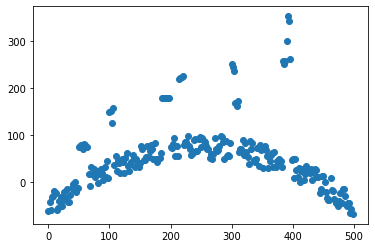

In [3]:
plt.scatter(X,Y)

In [4]:
def SVD(X,Y):
    parameter=np.dot(X.T,X)
    parameter=np.dot(np.linalg.inv(parameter),X.T)
    parameter=np.dot(parameter,Y).T 

    return parameter

In [5]:
def create_dep(x):
    return np.concatenate((np.square(x),x,np.ones(x.shape)),axis=1)

In [6]:
ransac_model=RANSAC.RANSAC(SVD)
X_quad=create_dep(X)
parameters=ransac_model.solve_ransac(X_quad,Y)
Y_pred,error_ransac=ransac_model.make_prediction(parameters,X_quad,Y)

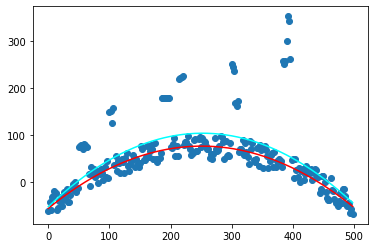

In [8]:
plt.scatter(X,Y)
plt.plot(X,Y_pred,c='red')